<a href="https://colab.research.google.com/github/Vik-Gt-321/Aerospace-Codes/blob/main/Climb-plot-and-schedule.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
import math
import matplotlib.pyplot as plt

In [ ]:
Cd0 = 0.036
e = 0.8
AR = 8.8
k = 1/(math.pi*e*AR)
S = 12.47

w = 750*9.81
rho_sl = 1.225

eta = 0.8

# Pexcess vs height

In [ ]:
v_initial = 50

In [ ]:
def density(h, beta):
  eps = 1
  # if beta == 9254:
  #   h = h - 11000
  #   eps = 0.3063
  return 1.225*eps*np.exp(-h/beta)

In [ ]:
def P_ex(h, v, greater):
  if(greater):
    beta = 9254
  else:
    beta = 9296

  rho = density(h, beta)
  sigma = rho/rho_sl

  P_ssl = 100*0.7457*1000
  P_a = eta*P_ssl*(sigma**(1/3))
  P_r = 0.5*rho*(v**3)*S*Cd0 + (k*w**2)/(0.5*rho*v*S)
  P_e = P_a - P_r
  return P_e

Text(0, 0.5, 'Excess Power (in Hp)')

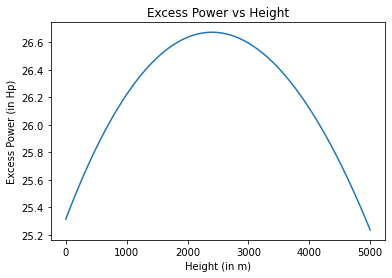

In [ ]:
h = np.linspace(0, 5000, 20000)
Pe = P_ex(h, v_initial, greater = False)
# print(Pe)
plt.plot(h, Pe/745.7)
plt.title("Excess Power vs Height")
plt.xlabel("Height (in m)")
plt.ylabel("Excess Power (in Hp)")

# Excess Power vs Vel

In [ ]:
v = np.linspace(1, 70, 1000)

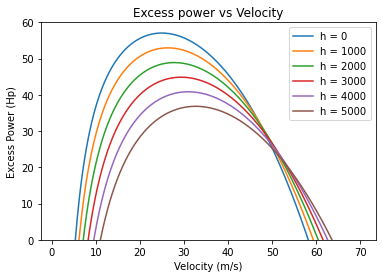

In [ ]:
plt.plot(v, P_ex(h = 0, v = v, greater = False)/745.7)
plt.plot(v, P_ex(h = 1000, v = v, greater = False)/745.7)
plt.plot(v, P_ex(h = 2000, v = v, greater = False)/745.7)
plt.plot(v, P_ex(h = 3000, v = v, greater = False)/745.7)
plt.plot(v, P_ex(h = 4000, v = v, greater = False)/745.7)
plt.plot(v, P_ex(h = 5000, v = v, greater = False)/745.7)

plt.ylim(ymin=0, ymax=60)
plt.title("Excess power vs Velocity")
plt.xlabel("Velocity (m/s)")
plt.ylabel("Excess Power (Hp)")
plt.legend(["h = 0", "h = 1000", "h = 2000","h = 3000", "h = 4000", "h = 5000" ])

# Service and Abs cieling

In [ ]:
def density_for_cieling(h):
  eps = 1
  if type(h) is int :
    if h < 11000:
      beta = 9296
    else:
      beta = 9254
      # h = h - 11000
      # eps = 0.3063
    return 1.225*eps*np.exp(-h/beta)
  if h.size == 1:
    if h < 11000:
      beta = 9296
    else:
      # h = h - 11000
      beta = 9254
      # eps = 0.3063
    return 1.225*eps*np.exp(-h/beta)
  ans = []
  for i in h:
    if i < 11000:
      beta = 9296
    else:
      beta = 9254
      # i = i - 11000
      # eps = 0.3063
    ans.append(1.225**eps*math.exp(-i/beta))
  return np.array(ans)

In [ ]:
(np.zeros(5)).size

5

In [ ]:
def v_roc_max(h):
  # CL = math.sqrt(3)*Cl_star     #### point of doubt
  Cl = 1.5
  rho = density_for_cieling(h)
  sigma = rho/rho_sl
  return np.sqrt(2*w/(rho*Cl*S))

Text(0.5, 0, 'v_roc_max (m/s)')

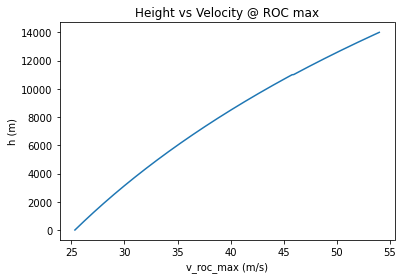

In [ ]:
# checking if the vroc max fn is working 
h_roc_max = np.linspace(0, 14000, 2000)
plt.plot(v_roc_max(h_roc_max), h_roc_max)
plt.title("Height vs Velocity @ ROC max")
plt.ylabel("h (m)")
plt.xlabel("v_roc_max (m/s)")

In [ ]:
def gamma(h):
  
  Cl = 1.5


  rho = density_for_cieling(h)
  sigma = rho/rho_sl

  P_ssl = 100*0.7457*1000
  P_a = eta*P_ssl*(sigma**(1/3))

  v_roc_m = v_roc_max(h)

  t1 = P_a/(w*v_roc_m) 
  t2 = rho*v_roc_m*v_roc_m*S*Cd0/(2*w)
  t3 = 2*k*w/(rho*S*v_roc_m*v_roc_m)


  return np.arcsin(t1 - t2 - t3)

In [ ]:
def max_roc(h):
  v_roc_m = v_roc_max(h)
  gam = gamma(h)
  return v_roc_m*np.sin(gam)

Finding abs cieling and service

In [ ]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx], idx

In [ ]:
h = np.linspace(0, 14000, 5000)
roc_max = max_roc(h)
abs_roc, i_abs = find_nearest(roc_max, 0)
ser_roc, i_ser = find_nearest(roc_max, 0.508)
if abs_roc < 0:
  i_abs = i_abs + 1
print(ser_roc, abs_roc, i_ser, i_abs)

0.508590556404153 -0.00011324481974941326 4536 4951


In [ ]:
h_abs = h[i_abs]
h_ser = h[i_ser]

Text(0, 0.5, 'Altitude (m)')

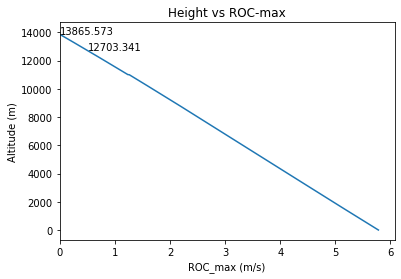

In [ ]:
h = np.linspace(0, 14000, 5000)

plt.plot(max_roc(h), h)
plt.xlim(xmin=0)
plt.text(max_roc(h[i_abs]), h[i_abs], f"{h[i_abs]:.3f}")
plt.text(max_roc(h[i_ser]), h[i_ser], f"{h[i_ser]:.3f}")

plt.title("Height vs ROC-max")
plt.xlabel("ROC_max (m/s)")
plt.ylabel('Altitude (m)')

# He vs v @ const h and H vs V @ const He

In [ ]:
# he vs v plot 
v_he = np.linspace(0, 70, 1000)
def he(v, h):
  return  v**2 / (2*9.81) + h

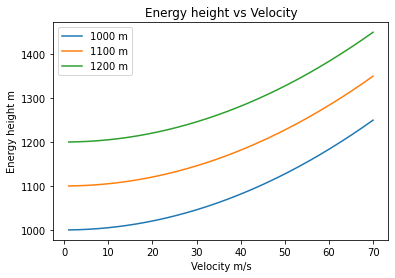

In [ ]:
plt.plot(v, he(v, 1000))
plt.plot(v, he(v, 1100))
plt.plot(v, he(v, 1200))
plt.title("Energy height vs Velocity")
plt.xlabel("Velocity m/s")
plt.ylabel("Energy height m")
plt.legend(["1000 m", "1100 m", "1200 m"])

In [ ]:
v_h = np.linspace(0, 500, 1000)
def h(v, he):
  return  he - v**2 / (2*9.81) 

(0.0, 9937.10499490316)

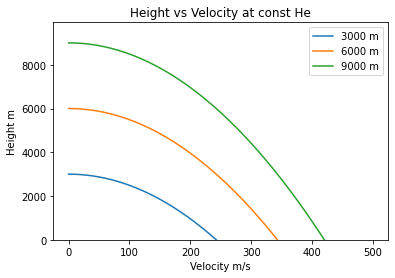

In [ ]:
f, ax = plt.subplots(1)
ax.plot(v_h, h(v_h, 3000))
ax.plot(v_h, h(v_h, 6000))
ax.plot(v_h, h(v_h, 9000))
ax.set_title("Height vs Velocity at const He")
ax.set_xlabel("Velocity m/s")
ax.set_ylabel("Height m")
ax.legend(["3000 m", "6000 m", "9000 m"])
ax.set_ylim(ymin = 0)

# Climb plot

In [ ]:
def density(h, beta):
  return 1.225*np.exp(-h/beta)

In [ ]:
def f(v, h, greater):
  if(greater):
    beta = 9254
  else:
    beta = 9296

  rho = density(h, beta)
  sigma = rho/rho_sl

  P_ssl = 100*0.7457*1000
  P_a = eta*P_ssl*(sigma**(1/3))
  P_r = (0.5*rho*(v**3)*S*Cd0) + ((k*w**2)/(0.5*rho*v*S))
  P_e = P_a - P_r
  
  P_se = P_e/w

  return P_se

In [ ]:
def climb_plot(v, h1, h2):

  X, Y1 = np.meshgrid(v, h1)
  X, Y2 = np.meshgrid(v, h2)

  Z1 = f(X, Y1, greater = False)
  Z2 = f(X, Y2, greater = True)

  levels = np.linspace(0, 5, 10)

  contours1 = plt.contour(X, Y1, Z1 , levels)
  contours2 = plt.contour(X, Y2, Z2 , levels)
  plt.clabel(contours1, inline=0, fontsize=12)
  plt.title("Climb Plot @ constant Pes")
  plt.ylabel("Altitude (m)")
  plt.xlabel("Velocity (m/s)")
  plt.ylim(ymin = 0, ymax = 15000)
  # plt.legend()

In [ ]:
def climb_schedule(h1, h2):
  beta1 = 9296
  beta2 = 9254
  rho1 = density(h1, beta1)
  rho2 = density(h2, beta2)
  sigma1 = rho1/rho_sl
  sigma2 = rho2/rho_sl

  Cl = (1.5) # greater than 1.5
  v1 = np.sqrt((2*w)/(rho1*S)) / np.sqrt(Cl)  #vroc max
  v2 = np.sqrt((2*w)/(rho2*S)) / np.sqrt(Cl)

  plt.plot(v1, h1)
  plt.plot(v2, h2)
  plt.legend(["climb schedule", "climb schedule"])

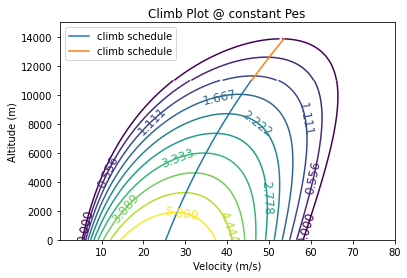

In [ ]:
v = np.linspace(0.01, 80, 200)
h1 = np.linspace(0, 11000, 200)
h2 = np.linspace(11000, h_abs, 200)

climb_plot(v, h1, h2)
climb_schedule(h1, h2)

#Min time to climb

using log method assuming roc_max vs v is linear

In [ ]:
h = np.linspace(0, 14000, 5000)
roc_max = max_roc(h)
abs_roc, i_abs = find_nearest(roc_max, 0)
ser_roc, i_ser = find_nearest(roc_max, 0.508)
if abs_roc < 0:
  i_abs = i_abs +1
print(ser_roc, abs_roc, i_ser, i_abs)

0.508590556404153 -0.00011324481974941326 4536 4951


In [ ]:
h_abs = h[i_abs]
h_ser = h[i_ser]
print(h_abs, h_ser)
roc_msl = max_roc(0)

13865.573114622925 12703.340668133627


In [ ]:
t_min = h_abs/roc_msl*math.log(1/ (1 - h_ser/h_abs))

In [ ]:
t_min/3600

1.6515782457660193

using summation method

In [ ]:
h_time_calc = np.linspace(0, round(h_ser), 40000)

In [ ]:
roc_max_inv = 1/max_roc(h_time_calc)

In [ ]:
len(h_time_calc)

40000

In [ ]:
len(roc_max_inv)

40000

Text(0.5, 0, '1/ROC_max (m/s)')

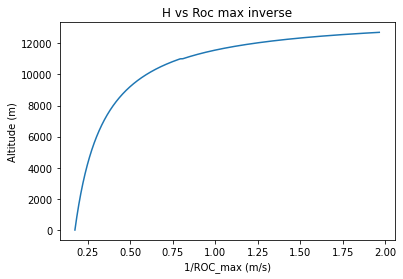

In [ ]:
plt.plot(roc_max_inv, h_time_calc)
plt.title("H vs Roc max inverse")
plt.ylabel("Altitude (m)")
plt.xlabel("1/ROC_max (m/s)")

In [ ]:
a = np.ones(3) + 2
b = 4*np.ones(3)
a*b

array([12., 12., 12.])

In [ ]:
ti = 0
for i in range(len(h_time_calc) - 1):
  h0 = h_time_calc[i]
  h1 = h_time_calc[i+1]
  dh = h1  -h0
  v0 = roc_max_inv[i]
  ti = ti + dh*v0


In [ ]:
ti/3600

1.6014825188280022